In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [5]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just SHH group

In [7]:
group4_list = set()

for column in data.columns:
    if "Group 4" in column: 
        group4_list = group4_list.union(set(data[column].replace({"":None}).dropna()))   

print(group4_list)

{'KDM6A', 'CUX2', 'POU2F1', 'SIX2', 'EOMES/TBR2', 'EN2', 'ERK', 'EZH2', 'LMX1A', 'KDM1A', 'SIX6', 'HLF', 'KDM5A', 'KDM3A', 'ARID5B', 'MLL3', 'BARHL1', 'UNC5D', 'SNCAIP', 'ZMYM3', 'KDM5B', 'LHX2', 'EOMES', 'LHX1', 'STAT5A', 'OTX2', 'ZNF35', 'ZNF513', 'MYCN', 'ZIC4', 'AKT', 'UNCX', 'KDM4C', 'KDM7A', 'CHD7', 'KHDR2', 'LHX5', 'TBR1', 'ZIC1'}


# Creating a Network starting from All Omnipath interactions

In [8]:
group4_net = Network(group4_list, resources = omnipath)

Error: node SIX2 is not present in the resources database
Error: node EOMES/TBR2 is not present in the resources database
Error: node LMX1A is not present in the resources database
Error: node HLF is not present in the resources database
Error: node EOMES is not present in the resources database
Error: node ZNF35 is not present in the resources database
Error: node ZNF513 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node UNCX is not present in the resources database
Error: node CHD7 is not present in the resources database
Error: node KHDR2 is not present in the resources database
Error: node LHX5 is not present in the resources database


Adding the node that were not found manually: PDLI3 --> PDLIM3, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
group4_net.add_node("TBR2")

Error: node TBR2 is not present in the resources database


In [10]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KDM6A,O15550,NaN
1,CUX2,O14529,NaN
2,POU2F1,P14859,NaN
3,EN2,P19622,NaN
4,EPHB2,P29323,NaN
5,EZH2,Q15910,NaN
6,KDM1A,O60341,NaN
7,SIX6,O95475,NaN
8,KDM5A,P29375,NaN
9,KDM3A,Q9Y4C1,NaN


In [11]:
group4_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

In [12]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KDM6A,O15550,NaN
1,CUX2,O14529,NaN
2,POU2F1,P14859,NaN
3,EN2,P19622,NaN
4,EPHB2,P29323,NaN
...,...,...,...
76,DLX5,P56178,NaN
77,MSX1,P28360,NaN
78,KHSRP,Q92945,NaN
79,DVL3,Q92997,NaN


In [13]:
group4_net.edges

,source,target,Type,Effect,References
0,O15550,P06400,None,stimulation,SPIKE:20123895;SPIKE_LC:20123895
1,P06400,Q14209,None,inhibition,DIP:7739537;DIP:8657117;ELM:12502741;HPRD:1250...
2,Q14209,Q15910,None,stimulation,ACSN:14532106;SPIKE:14532106;SPIKE:18319725;SP...
3,P06400,Q01094,None,inhibition,BioGRID:10393912;BioGRID:12963846;BioGRID:1567...
4,Q01094,Q15910,None,stimulation,ACSN:14532106;SPIKE:14532106;SPIKE:18319725;SP...
...,...,...,...,...,...
178,Q92997,Q9HCP0,None,stimulation,SignaLink3:10535959;SignaLink3:23331499
179,Q9HCP0,Q16650,None,stimulation,CA1:10749215
180,Q92945,P12931,None,stimulation,SIGNOR:9858532
181,Q9HCP0,P04637,None,stimulation,KEA:10606744;KEA:10673501;KEA:10747897;KEA:109...


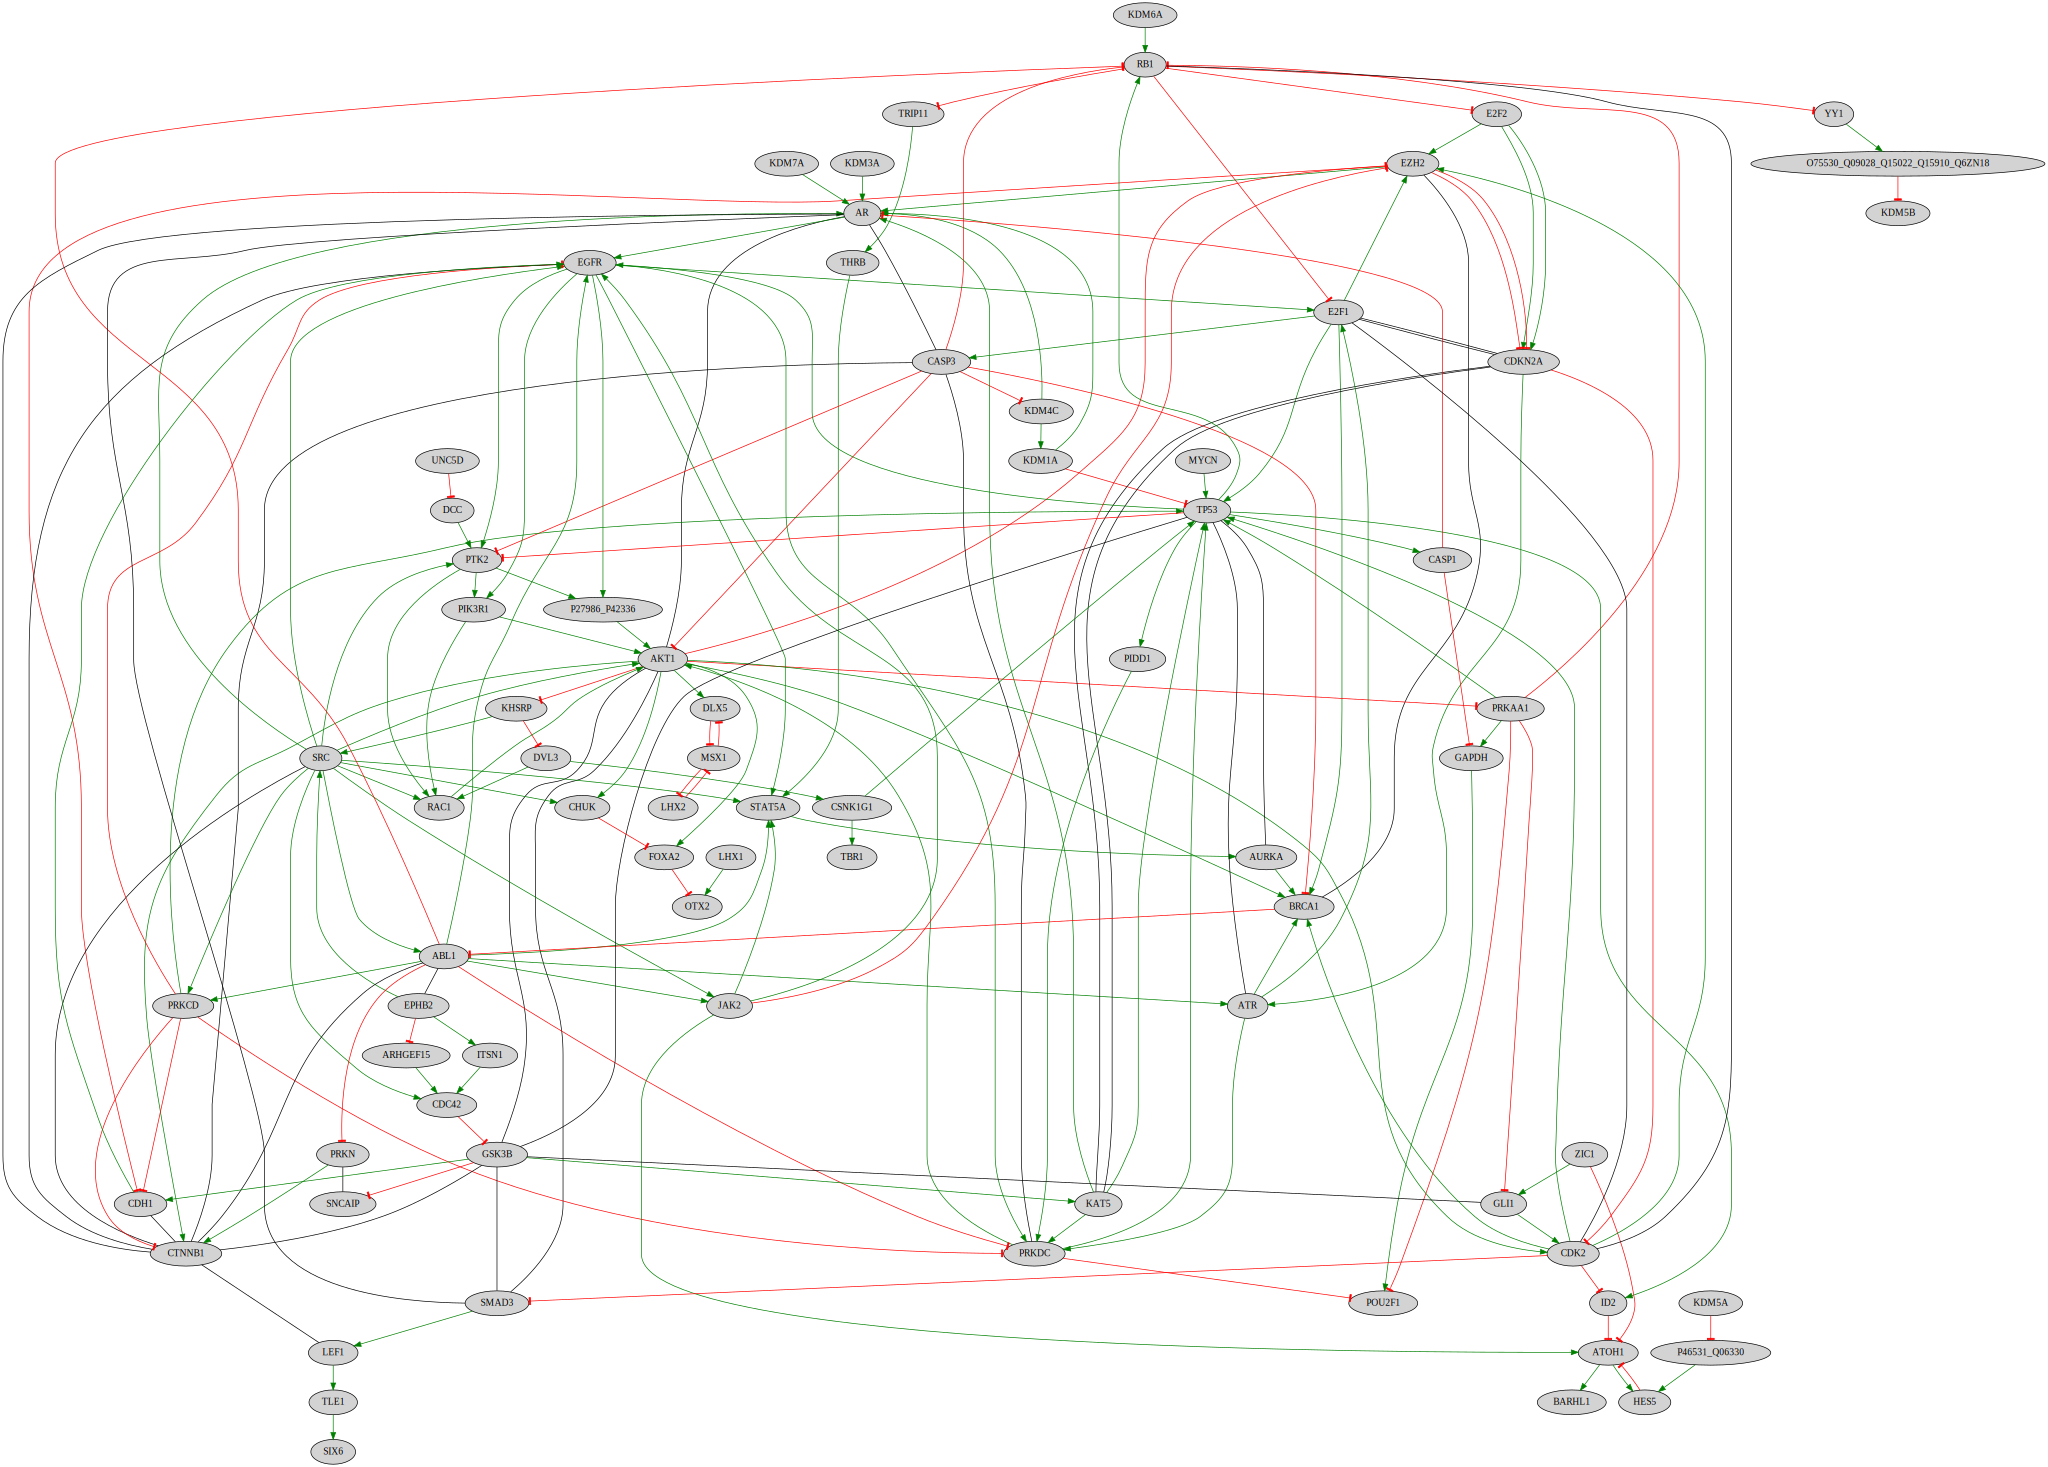

In [23]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect')
output = figures_folder + "Group4/Group4_all_omnipath"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [15]:
from neko._outputs.exports import Exports

In [17]:
for node in group4_net.nodes["Uniprot"]:
    if group4_net.edges[group4_net.edges["source"].isin([node])].empty and group4_net.edges[group4_net.edges["target"].isin([node])].empty:
        print(group4_net.nodes[group4_net.nodes["Uniprot"] == node])
        group4_net.remove_node(node)

  Genesymbol Uniprot Type
1       CUX2  O14529  NaN
  Genesymbol Uniprot Type
3        EN2  P19622  NaN
   Genesymbol Uniprot Type
10     ARID5B  Q14865  NaN
   Genesymbol Uniprot Type
11      KMT2C  Q8NEZ4  NaN
   Genesymbol Uniprot Type
15      ZMYM3  Q14202  NaN


In [18]:
export = Exports(group4_net)

In [19]:
export.export_sif(sif_output + "Group4_all_omnipath.sif")